In [8]:
import random

import numpy as np

import matplotlib.pyplot as plt

from scipy.spatial import Voronoi, voronoi_plot_2d

from lloyd.lloyd import Field

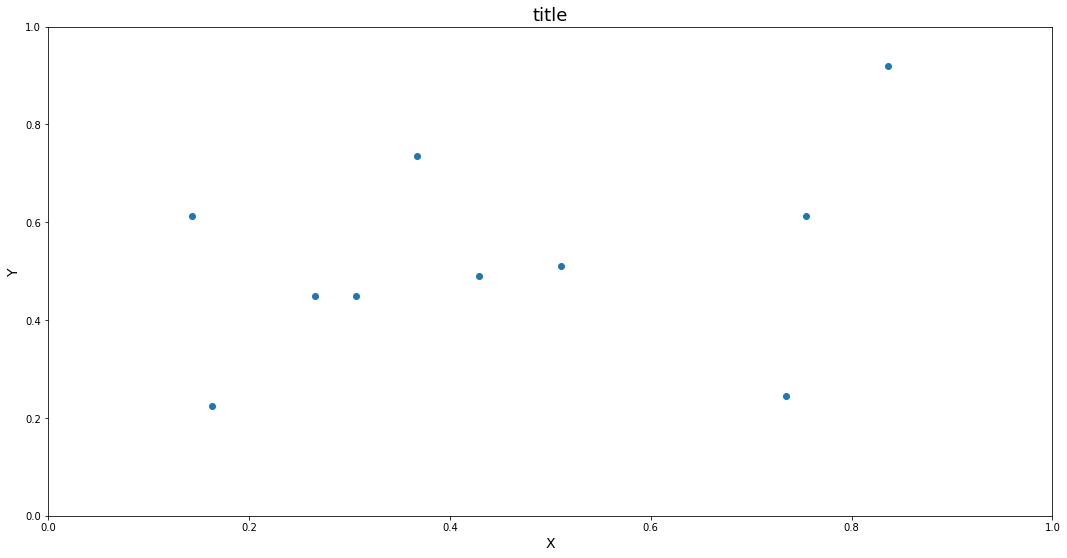

In [9]:
plt.close("all")

#currently just manual entry but will make user input. Will have to limit N based on minimum distance 
# between points and overall area.
a = 1         # x bound
b = 1         # y bound
N = 10        # number of points

def distance(p, points, min_distance):
    """
    Determines if any points in the list are less than the minimum specified 
    distance apart.

    Parameters
    ----------
    p : tuple
        `(x,y)` point.
    points : ndarray
        Array of points to check against. `x, y` points are columnwise.
    min_distance : float
        Minimum allowable distance between any two points.

    Returns
    -------
    bool
        True if point `p` is at least `min_distance` from all points in `points`.

    """
    distances = np.sqrt(np.sum((p+points)**2, axis=1))
    distances = np.where(distances < min_distance)
    return distances[0].size < 1

points = np.array([])       # x, y columnwise
while points.shape[0] < N:
    x = random.choice(np.linspace(0, a))
    y = random.choice(np.linspace(0, b))
    p = (x,y)
    if len(points) == 0:                # add first point blindly
        points = np.array([p])
    elif distance(p, points, 0.1):     # ensure the minimum distance is met
        points = np.vstack((points, p))
        
fig = plt.figure(figsize=(18,9))
ax = plt.axes()
ax.set_xlim([0, a])
ax.set_ylim([0, b])
ax.set_title('title',fontsize=18)
ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.scatter(points[:,0], points[:,1])

In [21]:
vor = Voronoi(points)

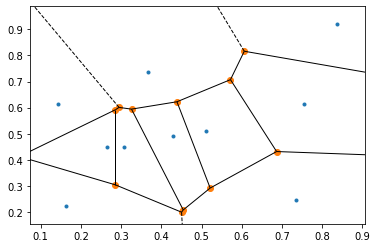

In [22]:

fig = voronoi_plot_2d(vor)
plt.show()

In [29]:
# create a lloyd model on which one can perform iterations
field = Field(points)

# run one iteration of Lloyd relaxation on the field of points
field.relax()

# get the resulting point positions
new_positions = field.get_points()

#Reassign this new setup to the original
vor = Voronoi(new_positions)


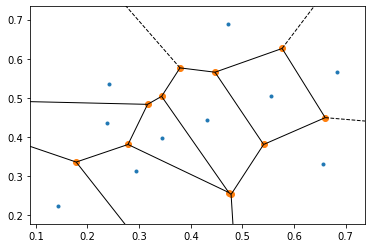

In [30]:
fig = voronoi_plot_2d(vor)
plt.show()

In [14]:
#for i in range(6): 
#  Field.relax_points()
#  plt = voronoi_plot_2d(Field.voronoi, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
#  plt.show()